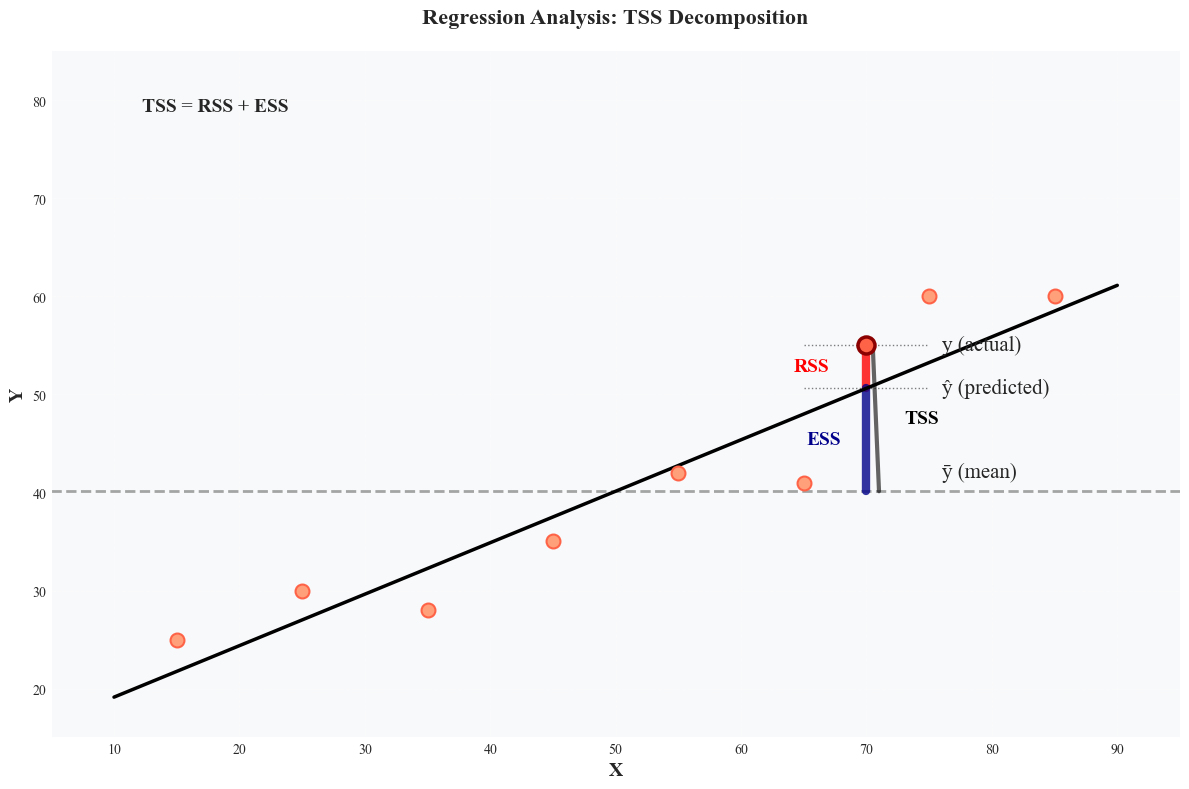

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

with plt.rc_context({'font.family':'Times New Roman'}):
    # Set style for better visuals
    #plt.style.use('seaborn-v0_8-darkgrid')
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Generate data
    np.random.seed(42)
    x = np.array([15, 25, 35, 45, 55, 65, 75, 85])
    y = np.array([25, 30, 28, 35, 42, 41, 60, 60])  # Adjusted last point higher
    
    # Fit regression line
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients
    x_line = np.linspace(10, 90, 100)
    y_pred_line = slope * x_line + intercept
    
    # Calculate mean of y
    y_mean = np.mean(y)
    
    # Plot regression line
    ax.plot(x_line, y_pred_line, 'k-', linewidth=2.5, zorder=3)
    
    # Plot mean line
    ax.axhline(y=y_mean, color='gray', linestyle='--', linewidth=2, alpha=0.7)
    
    # Plot data points
    ax.scatter(x, y, color='#FFA07A', s=100, edgecolor='#FF6347', linewidth=1.5, zorder=4)
    
    # Example point for TSS decomposition (further from ŷ)
    example_x = 70
    actual_y = 55  # Actual value (far from predicted)
    predicted_y = slope * example_x + intercept  # Predicted value (ŷ)
    
    # Plot example point (emphasized) - moved down to avoid ESS overlap
    ax.scatter(example_x, actual_y, color='#FF6347', s=150, edgecolor='#8B0000', 
               linewidth=2.5, zorder=5, marker='o')
    
    # Draw RSS (Residual - Red)
    ax.plot([example_x, example_x], [actual_y, predicted_y], 'r-', linewidth=6, 
            alpha=0.8, solid_capstyle='round')
    
    # Draw ESS (Explained - Dark Blue)
    ax.plot([example_x, example_x], [predicted_y, y_mean], color='darkblue', linewidth=6, 
            alpha=0.8, solid_capstyle='round')
    
    # Draw TSS (Total - Black)
    ax.plot([example_x + .5, example_x + 1], [actual_y, y_mean], 'k-', linewidth=3, 
            alpha=0.6)
    
    # Add horizontal dotted lines
    ax.plot([example_x - 5, example_x + 5], [actual_y, actual_y], 'k:', linewidth=1, alpha=0.5)
    ax.plot([example_x - 5, example_x + 5], [predicted_y, predicted_y], 'k:', linewidth=1, alpha=0.5)
    
    # Labels for segments - positioned closer to bars
    ax.text(example_x - 3, (actual_y + predicted_y) / 2, 'RSS', fontsize=14, fontweight='bold', 
            color='red', va='center', ha='right')
    ax.text(example_x - 2, (predicted_y + y_mean) / 2, 'ESS', fontsize=14, fontweight='bold', 
            color='darkblue', va='center', ha='right')
    ax.text(example_x + 3, (actual_y + y_mean) / 2, 'TSS', fontsize=14, fontweight='bold', 
            color='black', va='center')
    
    # Point labels
    ax.text(example_x + 6, actual_y, 'y (actual)', fontsize=15, va='center')
    ax.text(example_x + 6, predicted_y, 'ŷ (predicted)', fontsize=15, va='center')
    ax.text(example_x + 6, y_mean+2, 'ȳ (mean)', fontsize=15, va='center')
    
    # Add text boxes with formulas only
    formula_text = 'TSS = RSS + ESS'
    # formula_box = FancyBboxPatch((0.02, 0.88), 0.25, 0.08, 
    #                               boxstyle="round,pad=0.01", 
    #                               transform=ax.transAxes,
    #                               facecolor='white', 
    #                               edgecolor='gray',
    #                               linewidth=2)
    # ax.add_patch(formula_box)
    ax.text(0.145, 0.92, formula_text, transform=ax.transAxes, 
            fontsize=14, fontweight='bold', ha='center', va='center')
    
    # Calculate R-squared
    ss_tot = np.sum((y - y_mean) ** 2)
    y_pred_all = slope * x + intercept
    ss_res = np.sum((y - y_pred_all) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Add R-squared text box
    # r2_text = f'R² = ESS/TSS = {r_squared:.3f}'
    # ax.text(0.85, 0.05, r2_text, transform=ax.transAxes,
    #         fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Set labels and title
    ax.set_xlabel('X', fontsize=14, fontweight='bold')
    ax.set_ylabel('Y', fontsize=14, fontweight='bold')
    ax.set_title('Regression Analysis: TSS Decomposition', fontsize=16, fontweight='bold', pad=20)
    
    # Set axis limits for better visualization
    ax.set_xlim(5, 95)
    ax.set_ylim(15, 85)
    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Fine-tune the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # Add a subtle background color
    ax.set_facecolor('#F8F9FA')
    fig.patch.set_facecolor('white')
    
    plt.tight_layout()
    plt.show()



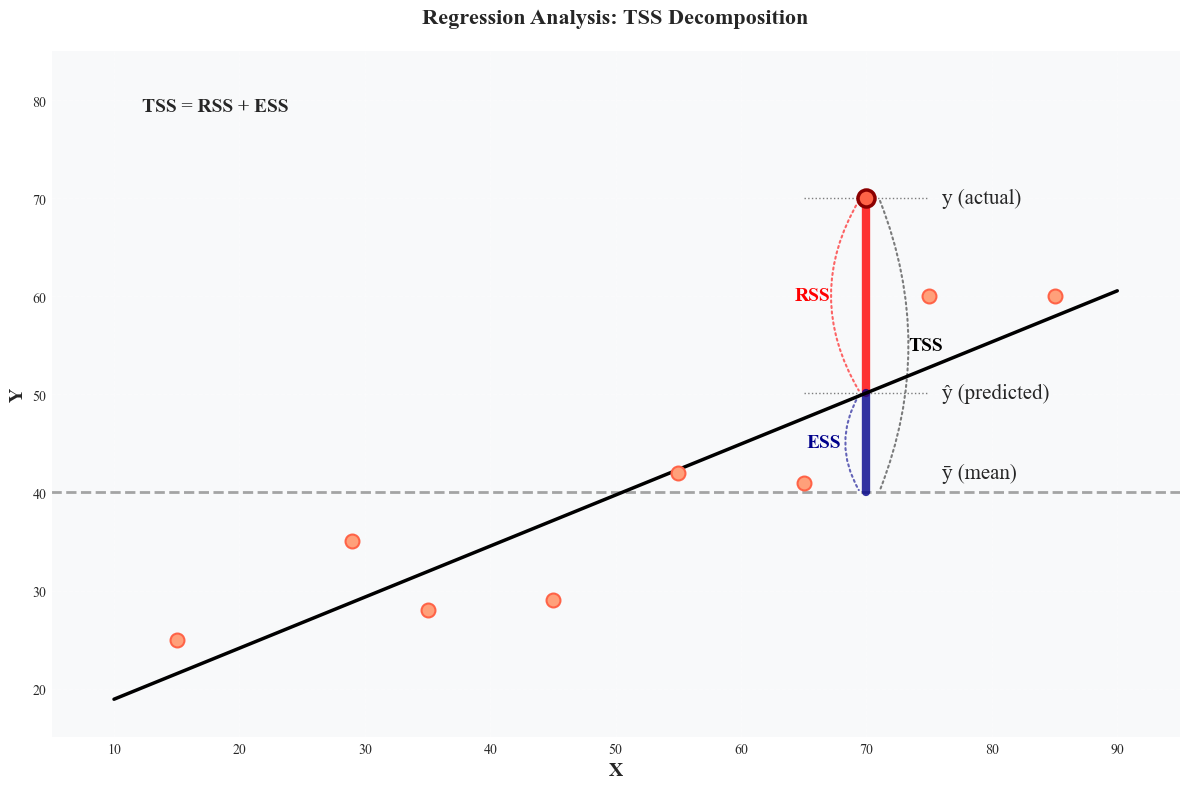

REGRESSION ANALYSIS RESULTS
Regression Equation: y = 0.521x + 13.706
Mean of Y (ȳ): 40.00

Example Point (x=70):
  Actual value (y): 70.00
  Predicted value (ŷ): 50.15
  Residual (y - ŷ): 19.85

Decomposition:
  TSS (Total): 30.00
  RSS (Residual): 19.85
  ESS (Explained): 10.15
  Verification: TSS = RSS + ESS
  30.00 = 19.85 + 10.15

Model Performance:
  R-squared: 0.8244
  This means 82.44% of variance is explained by the model


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch, Arc, FancyArrowPatch
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches

with plt.rc_context({'font.family':'Times New Roman'}):
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Generate data
    np.random.seed(42)
    x = np.array([15, 29, 35, 45, 55, 65, 75, 85])
    y = np.array([25, 35, 28, 29, 42, 41, 60, 60])
    
    # Fit regression line
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients
    x_line = np.linspace(10, 90, 100)
    y_pred_line = slope * x_line + intercept
    
    # Calculate mean of y
    y_mean = np.mean(y)
    
    # Plot regression line
    ax.plot(x_line, y_pred_line, 'k-', linewidth=2.5, zorder=3)
    
    # Plot mean line
    ax.axhline(y=y_mean, color='gray', linestyle='--', linewidth=2, alpha=0.7)
    
    # Plot data points
    ax.scatter(x, y, color='#FFA07A', s=100, edgecolor='#FF6347', linewidth=1.5, zorder=4)
    
    # Example point for TSS decomposition
    example_x = 70
    actual_y = 70
    predicted_y = slope * example_x + intercept
    
    # Plot example point (emphasized)
    ax.scatter(example_x, actual_y, color='#FF6347', s=150, edgecolor='#8B0000', 
               linewidth=2.5, zorder=5, marker='o')
    
    # Draw RSS (Residual - Red)
    ax.plot([example_x, example_x], [actual_y, predicted_y], 'r-', linewidth=6, 
            alpha=0.8, solid_capstyle='round')
    
    # Draw ESS (Explained - Dark Blue)
    ax.plot([example_x, example_x], [predicted_y, y_mean], color='darkblue', linewidth=6, 
            alpha=0.8, solid_capstyle='round')
    
    # Draw TSS (Total - Black)
    # ax.plot([example_x + 1, example_x + 1], [actual_y, y_mean], 'k-', linewidth=3, 
    #         alpha=0.6)
    
    # Add horizontal dotted lines
    ax.plot([example_x - 5, example_x + 5], [actual_y, actual_y], 'k:', linewidth=1, alpha=0.5)
    ax.plot([example_x - 5, example_x + 5], [predicted_y, predicted_y], 'k:', linewidth=1, alpha=0.5)
    
    # Add curved dotted lines (arcs) for RSS
    # Upper arc for RSS
    arc_style = "arc3,rad=0.3"
    arrow1 = FancyArrowPatch((example_x - 0.5, actual_y), 
                            (example_x - 0.5, predicted_y),
                            connectionstyle=arc_style,
                            arrowstyle='-',
                            linestyle=':',
                            linewidth=1.5,
                            color='red',
                            alpha=0.6)
    ax.add_patch(arrow1)
    
    # Add curved dotted lines (arcs) for ESS
    # Lower arc for ESS
    arrow2 = FancyArrowPatch((example_x - 0.5, predicted_y), 
                            (example_x - 0.5, y_mean),
                            connectionstyle=arc_style,
                            arrowstyle='-',
                            linestyle=':',
                            linewidth=1.5,
                            color='darkblue',
                            alpha=0.6)
    ax.add_patch(arrow2)
    
    # Add curved dotted line for TSS (larger arc - rightward curve)
    arrow3 = FancyArrowPatch((example_x + 1, actual_y), 
                            (example_x + 1, y_mean),
                            connectionstyle="arc3,rad=-0.2",
                            arrowstyle='-',
                            linestyle=':',
                            linewidth=1.5,
                            color='black',
                            alpha=0.5)
    ax.add_patch(arrow3)
    
    # Labels for segments
    ax.text(example_x - 2.9, (actual_y + predicted_y) / 2, 'RSS', fontsize=14, fontweight='bold', 
            color='red', va='center', ha='right')
    ax.text(example_x - 2, (predicted_y + y_mean) / 2, 'ESS', fontsize=14, fontweight='bold', 
            color='darkblue', va='center', ha='right')
    ax.text(example_x + 3.3, (actual_y + y_mean) / 2, 'TSS', fontsize=14, fontweight='bold', 
            color='black', va='center')
    
    # Point labels
    ax.text(example_x + 6, actual_y, 'y (actual)', fontsize=15, va='center')
    ax.text(example_x + 6, predicted_y, 'ŷ (predicted)', fontsize=15, va='center')
    ax.text(example_x + 6, y_mean+2, 'ȳ (mean)', fontsize=15, va='center')
    
    # Add formula text
    formula_text = 'TSS = RSS + ESS'
    ax.text(0.145, 0.92, formula_text, transform=ax.transAxes, 
            fontsize=14, fontweight='bold', ha='center', va='center')
    
    # Calculate R-squared
    ss_tot = np.sum((y - y_mean) ** 2)
    y_pred_all = slope * x + intercept
    ss_res = np.sum((y - y_pred_all) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Set labels and title
    ax.set_xlabel('X', fontsize=14, fontweight='bold')
    ax.set_ylabel('Y', fontsize=14, fontweight='bold')
    ax.set_title('Regression Analysis: TSS Decomposition', fontsize=16, fontweight='bold', pad=20)
    
    # Set axis limits for better visualization
    ax.set_xlim(5, 95)
    ax.set_ylim(15, 85)
    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Fine-tune the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    # Add a subtle background color
    ax.set_facecolor('#F8F9FA')
    fig.patch.set_facecolor('white')
    
    plt.tight_layout()
    plt.show()

# Print numerical values
print("="*50)
print("REGRESSION ANALYSIS RESULTS")
print("="*50)
print(f"Regression Equation: y = {slope:.3f}x + {intercept:.3f}")
print(f"Mean of Y (ȳ): {y_mean:.2f}")
print(f"\nExample Point (x={example_x}):")
print(f"  Actual value (y): {actual_y:.2f}")
print(f"  Predicted value (ŷ): {predicted_y:.2f}")
print(f"  Residual (y - ŷ): {actual_y - predicted_y:.2f}")
print(f"\nDecomposition:")
print(f"  TSS (Total): {actual_y - y_mean:.2f}")
print(f"  RSS (Residual): {actual_y - predicted_y:.2f}")
print(f"  ESS (Explained): {predicted_y - y_mean:.2f}")
print(f"  Verification: TSS = RSS + ESS")
print(f"  {actual_y - y_mean:.2f} = {actual_y - predicted_y:.2f} + {predicted_y - y_mean:.2f}")
print(f"\nModel Performance:")
print(f"  R-squared: {r_squared:.4f}")
print(f"  This means {r_squared*100:.2f}% of variance is explained by the model")
print("="*50)